In [18]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
import requests

# Import the API key.
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url




'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d55ef688e590450fd11a4c0290988b6d'

In [19]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [20]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [21]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [ ]:
# Use the tuple() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
#    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
#          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [22]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


607

In [23]:
cities

['oyama',
 'punta arenas',
 'namatanai',
 'port macquarie',
 'dunedin',
 'concepcion',
 'lorengau',
 'bredasdorp',
 'laguna',
 'kizu',
 'adrar',
 'nome',
 'albany',
 'bang saphan',
 'avarua',
 'puerto madryn',
 'new norfolk',
 'attawapiskat',
 'saskylakh',
 'vaini',
 'port alfred',
 'castanos',
 'saint-augustin',
 'kamenskoye',
 'hithadhoo',
 'buala',
 'carnarvon',
 'mehamn',
 'mataura',
 'faanui',
 'torbay',
 'luorong',
 'boyolangu',
 'port lincoln',
 'kapaa',
 'hilo',
 'puerto ayora',
 'hobart',
 'jamestown',
 'ibra',
 'ushuaia',
 'soissons',
 'eureka',
 'niquero',
 'vostok',
 'kyaikto',
 'rikitea',
 'bluff',
 'san patricio',
 'callaguip',
 'lumut',
 'amderma',
 'busselton',
 'alappuzha',
 'chalons-en-champagne',
 'coquimbo',
 'kapoeta',
 'labuhan',
 'saint-philippe',
 'sao filipe',
 'siuri',
 'geraldton',
 'tual',
 'wladyslawowo',
 'alcaniz',
 'tessalit',
 'chuy',
 'qaanaaq',
 'komsomolskiy',
 'taolanaro',
 'bandarbeyla',
 'sawakin',
 'zhaotong',
 'sumbawa',
 'doha',
 'cidreira',
 '

In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [25]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    #Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | oyama
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | namatanai
Processing Record 4 of Set 1 | port macquarie
Processing Record 5 of Set 1 | dunedin
Processing Record 6 of Set 1 | concepcion
Processing Record 7 of Set 1 | lorengau
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | laguna
Processing Record 10 of Set 1 | kizu
City not found. Skipping...
Processing Record 11 of Set 1 | adrar
Processing Record 12 of Set 1 | nome
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | bang saphan
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | puerto madryn
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 19 of Set 1 | saskylakh
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | castanos
Processing Record 23 of Set 1 | saint-aug

Processing Record 40 of Set 4 | general roca
Processing Record 41 of Set 4 | asau
Processing Record 42 of Set 4 | wahiawa
Processing Record 43 of Set 4 | mnogovershinnyy
Processing Record 44 of Set 4 | dali
Processing Record 45 of Set 4 | vila
Processing Record 46 of Set 4 | riacho de santana
Processing Record 47 of Set 4 | bocaranga
City not found. Skipping...
Processing Record 48 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 49 of Set 4 | faya
Processing Record 50 of Set 4 | male
Processing Record 1 of Set 5 | matara
Processing Record 2 of Set 5 | port-de-paix
City not found. Skipping...
Processing Record 3 of Set 5 | besikduzu
Processing Record 4 of Set 5 | olafsvik
Processing Record 5 of Set 5 | sao joao da barra
Processing Record 6 of Set 5 | marsh harbour
Processing Record 7 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 5 | kavaratti
Processing Record 9 of Set 5 | butaritari
Processing Record 10 of Set 5 | san ignacio
Processin

Processing Record 30 of Set 8 | san agustin
Processing Record 31 of Set 8 | debre tabor
Processing Record 32 of Set 8 | pitimbu
Processing Record 33 of Set 8 | novyy urengoy
Processing Record 34 of Set 8 | turukhansk
Processing Record 35 of Set 8 | muromtsevo
Processing Record 36 of Set 8 | fourmies
Processing Record 37 of Set 8 | samarai
Processing Record 38 of Set 8 | mar del plata
Processing Record 39 of Set 8 | darnah
Processing Record 40 of Set 8 | elizabeth city
Processing Record 41 of Set 8 | bilibino
Processing Record 42 of Set 8 | kupang
Processing Record 43 of Set 8 | wattegama
Processing Record 44 of Set 8 | aklavik
Processing Record 45 of Set 8 | avera
Processing Record 46 of Set 8 | kaliganj
Processing Record 47 of Set 8 | hammerfest
Processing Record 48 of Set 8 | ixtapa
Processing Record 49 of Set 8 | san matias
Processing Record 50 of Set 8 | osinki
Processing Record 1 of Set 9 | grindavik
Processing Record 2 of Set 9 | gusinoye ozero
Processing Record 3 of Set 9 | pada

Processing Record 18 of Set 12 | askiz
Processing Record 19 of Set 12 | takoradi
Processing Record 20 of Set 12 | upata
Processing Record 21 of Set 12 | kalabo
Processing Record 22 of Set 12 | lethem
Processing Record 23 of Set 12 | gorgan
Processing Record 24 of Set 12 | elk city
Processing Record 25 of Set 12 | pacific grove
Processing Record 26 of Set 12 | ahipara
Processing Record 27 of Set 12 | de aar
Processing Record 28 of Set 12 | saky
Processing Record 29 of Set 12 | ponta do sol
Processing Record 30 of Set 12 | saint-pierre
Processing Record 31 of Set 12 | pontes e lacerda
Processing Record 32 of Set 12 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 33 of Set 12 | canon city
Processing Record 34 of Set 12 | conde
Processing Record 35 of Set 12 | angoram
Processing Record 36 of Set 12 | tecoanapa
Processing Record 37 of Set 12 | hosangadi
Processing Record 38 of Set 12 | cabatuan
Processing Record 39 of Set 12 | nelson bay
Processing Record 40 of Set 12 |

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Oyama,36.3000,139.8000,37.58,47,14,1.68,JP,2022-02-02 22:53:52
1,Punta Arenas,-53.1500,-70.9167,48.31,71,75,8.05,CL,2022-02-02 22:51:10
2,Namatanai,-3.6667,152.4333,80.24,80,100,8.14,PG,2022-02-02 22:50:22
3,Port Macquarie,-31.4333,152.9167,68.90,100,75,10.36,AU,2022-02-02 22:48:16
4,Dunedin,-45.8742,170.5036,55.42,92,100,10.98,NZ,2022-02-02 22:53:10
5,Concepcion,-36.8270,-73.0498,64.20,72,0,10.36,CL,2022-02-02 22:51:47
6,Lorengau,-2.0226,147.2712,80.26,80,100,11.54,PG,2022-02-02 22:44:44
7,Bredasdorp,-34.5322,20.0403,69.12,73,39,1.14,ZA,2022-02-02 22:49:58
8,Laguna,38.4210,-121.4238,62.40,28,0,8.99,US,2022-02-02 22:49:15
9,Adrar,20.5022,-10.0711,68.94,21,67,11.10,MR,2022-02-02 22:53:54


In [28]:
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Oyama,JP,2022-02-02 22:53:52,36.3000,139.8000,37.58,47,14,1.68
1,Punta Arenas,CL,2022-02-02 22:51:10,-53.1500,-70.9167,48.31,71,75,8.05
2,Namatanai,PG,2022-02-02 22:50:22,-3.6667,152.4333,80.24,80,100,8.14
3,Port Macquarie,AU,2022-02-02 22:48:16,-31.4333,152.9167,68.90,100,75,10.36
4,Dunedin,NZ,2022-02-02 22:53:10,-45.8742,170.5036,55.42,92,100,10.98
...,...,...,...,...,...,...,...,...,...
554,Morehead,US,2022-02-02 23:12:13,37.2711,-87.1764,51.15,93,100,10.36
555,Likasi,CD,2022-02-02 23:10:22,-10.9814,26.7333,61.66,97,100,3.20
556,Nalut,LY,2022-02-02 23:12:14,30.3333,10.8500,44.62,55,1,9.98
557,Saint-Ambroise,CA,2022-02-02 23:12:15,48.5501,-71.3324,32.49,95,100,7.90


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [31]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1643846243.070563

In [34]:
today = time.strftime("%x")
today

'02/02/22'

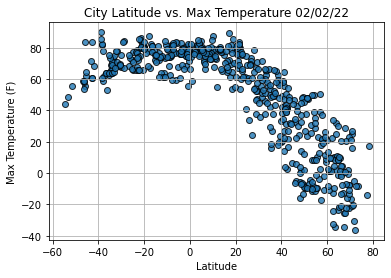

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

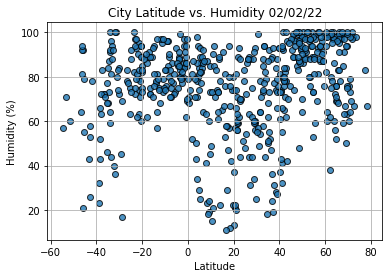

In [37]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

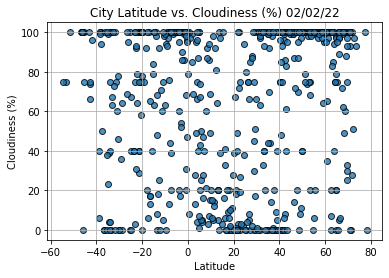

In [39]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


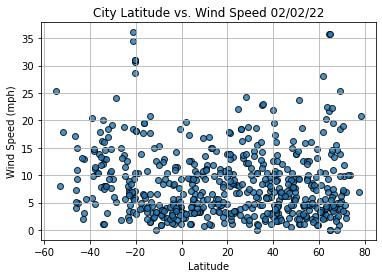

In [40]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()